In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("data/2023/2023_finalized_data.csv") 

positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

vif_columns = [
    "Age", "Games Played", "Games Started", "Passing Attempts", "Passing Completions",
    "Passing Yards", "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts",
    "Rushing Yards", "Rushing Touchdowns", "Targets", "Receptions", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "ESPN ADP", "Sleeper ADP", "NFL ADP",
    "RTSports ADP", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  117.825944
1                    Age    1.147959
2           Games Played    1.662958
3          Games Started    4.624021
4       Passing Attempts  687.528474
5    Passing Completions  871.560315
6          Passing Yards  192.955169
7     Passing Touchdowns   38.671928
8   Interceptions Thrown    9.730737
9       Rushing Attempts   33.312087
10         Rushing Yards   36.822314
11    Rushing Touchdowns    3.822338
12               Targets   61.215171
13            Receptions   52.457495
14       Receiving Yards   23.989159
15  Receiving Touchdowns    3.776485
16               Fumbles    3.120772
17                   XP2    1.131933
18              ESPN ADP    1.727613
19           Sleeper ADP    2.848140
20               NFL ADP    1.987579
21          RTSports ADP    2.983446
22           Average ADP    9.748826
23        Positional ADP    7.903428


In [33]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("data/2023/2023_finalized_data.csv") 
positions = ["QB", "TE", "RB", "WR"]
df_filtered = df[df["Position"].isin(positions)].copy()

vif_columns = [
    "Age", "Games Played", "Games Started",
    "Passing Yards", "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts",
    "Rushing Yards", "Rushing Touchdowns", "Receptions", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "ESPN ADP", "Sleeper ADP", "NFL ADP",
    "RTSports ADP", "Average ADP", "Positional ADP"
]

df_filtered[vif_columns] = df_filtered[vif_columns].fillna(0)

X = df_filtered[vif_columns]
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  116.767723
1                    Age    1.147495
2           Games Played    1.649749
3          Games Started    4.255440
4          Passing Yards   52.300365
5     Passing Touchdowns   29.115265
6   Interceptions Thrown    8.659416
7       Rushing Attempts   32.749853
8          Rushing Yards   36.464428
9     Rushing Touchdowns    3.783364
10            Receptions   19.208879
11       Receiving Yards   22.061643
12  Receiving Touchdowns    3.775204
13               Fumbles    3.071162
14                   XP2    1.119429
15              ESPN ADP    1.720812
16           Sleeper ADP    2.842748
17               NFL ADP    1.985040
18          RTSports ADP    2.962420
19           Average ADP    8.854524
20        Positional ADP    7.409488


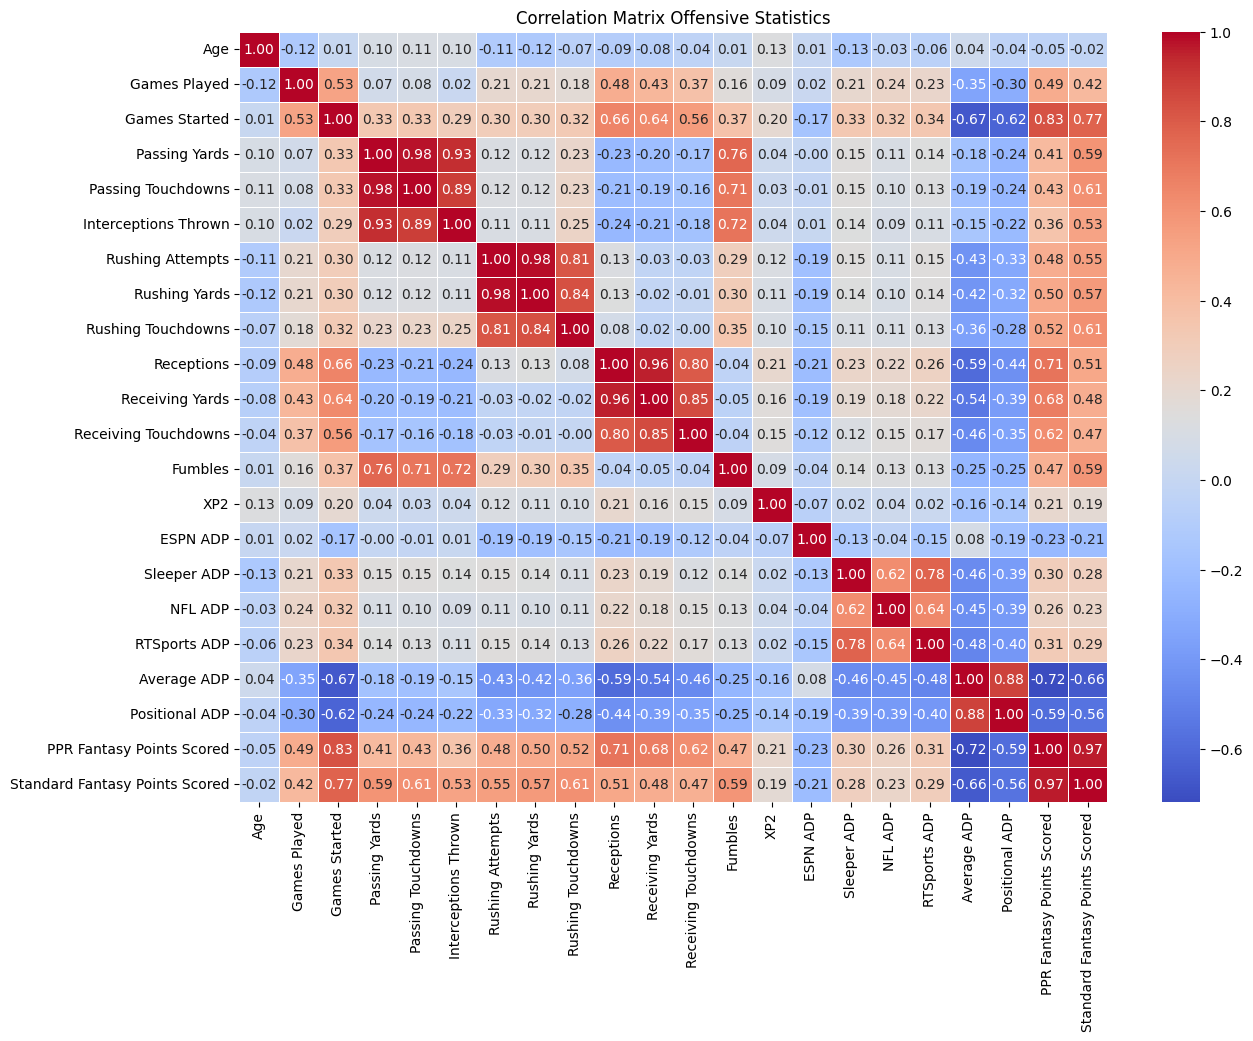

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_columns = [
    "Age", "Games Played", "Games Started",
    "Passing Yards", "Passing Touchdowns", "Interceptions Thrown", "Rushing Attempts",
    "Rushing Yards", "Rushing Touchdowns", "Receptions", "Receiving Yards",
    "Receiving Touchdowns", "Fumbles" , "XP2", "ESPN ADP", "Sleeper ADP", "NFL ADP",
    "RTSports ADP", "Average ADP", "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
]

correlation_matrix = df_filtered[corr_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Offensive Statistics")
plt.show()


In [35]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played", "Games Started", "Field Goals Attempted 0-39",
    "Field Goals Made 0-39", "Field Goals Attempted 40-49", "Field Goals Made 40-49",
    "Field Goals Attempted 50+", "Field Goals Made 50+", "Field Goals Attempted",
    "Field Goals Made", "Extra Points Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                        Feature         VIF
0                         const  313.227376
1                           Age    1.705098
2                  Games Played    1.869360
3                 Games Started         NaN
4    Field Goals Attempted 0-39         inf
5         Field Goals Made 0-39         inf
6   Field Goals Attempted 40-49         inf
7        Field Goals Made 40-49         inf
8     Field Goals Attempted 50+         inf
9          Field Goals Made 50+         inf
10        Field Goals Attempted         inf
11             Field Goals Made         inf
12       Extra Points Attempted  713.596869
13            Extra Points Made  717.232818
14                     ESPN ADP    6.016317
15                  Sleeper ADP    2.779596
16                      NFL ADP    2.634107
17                 RTSports ADP    2.769186
18                  Average ADP   59.638128
19               Positional ADP   72.153399


/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_kickers = df[df["Position"] == "K"].copy()

vif_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Field Goals Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_kickers[vif_columns_kickers] = df_kickers[vif_columns_kickers].fillna(0)

X_kickers = df_kickers[vif_columns_kickers]
X_kickers = sm.add_constant(X_kickers)  

vif_data_kickers = pd.DataFrame()
vif_data_kickers["Feature"] = X_kickers.columns
vif_data_kickers["VIF"] = [variance_inflation_factor(X_kickers.values, i) for i in range(X_kickers.shape[1])]

print(vif_data_kickers)


                   Feature         VIF
0                    const  301.192288
1                      Age    1.664744
2             Games Played    1.740381
3    Field Goals Made 0-39   33.110088
4   Field Goals Made 40-49   13.347132
5     Field Goals Made 50+    6.223045
6    Field Goals Attempted   96.473349
7        Extra Points Made    8.686606
8                 ESPN ADP    4.960932
9              Sleeper ADP    2.352826
10                 NFL ADP    2.410573
11            RTSports ADP    2.482195
12             Average ADP   51.347575
13          Positional ADP   64.390898


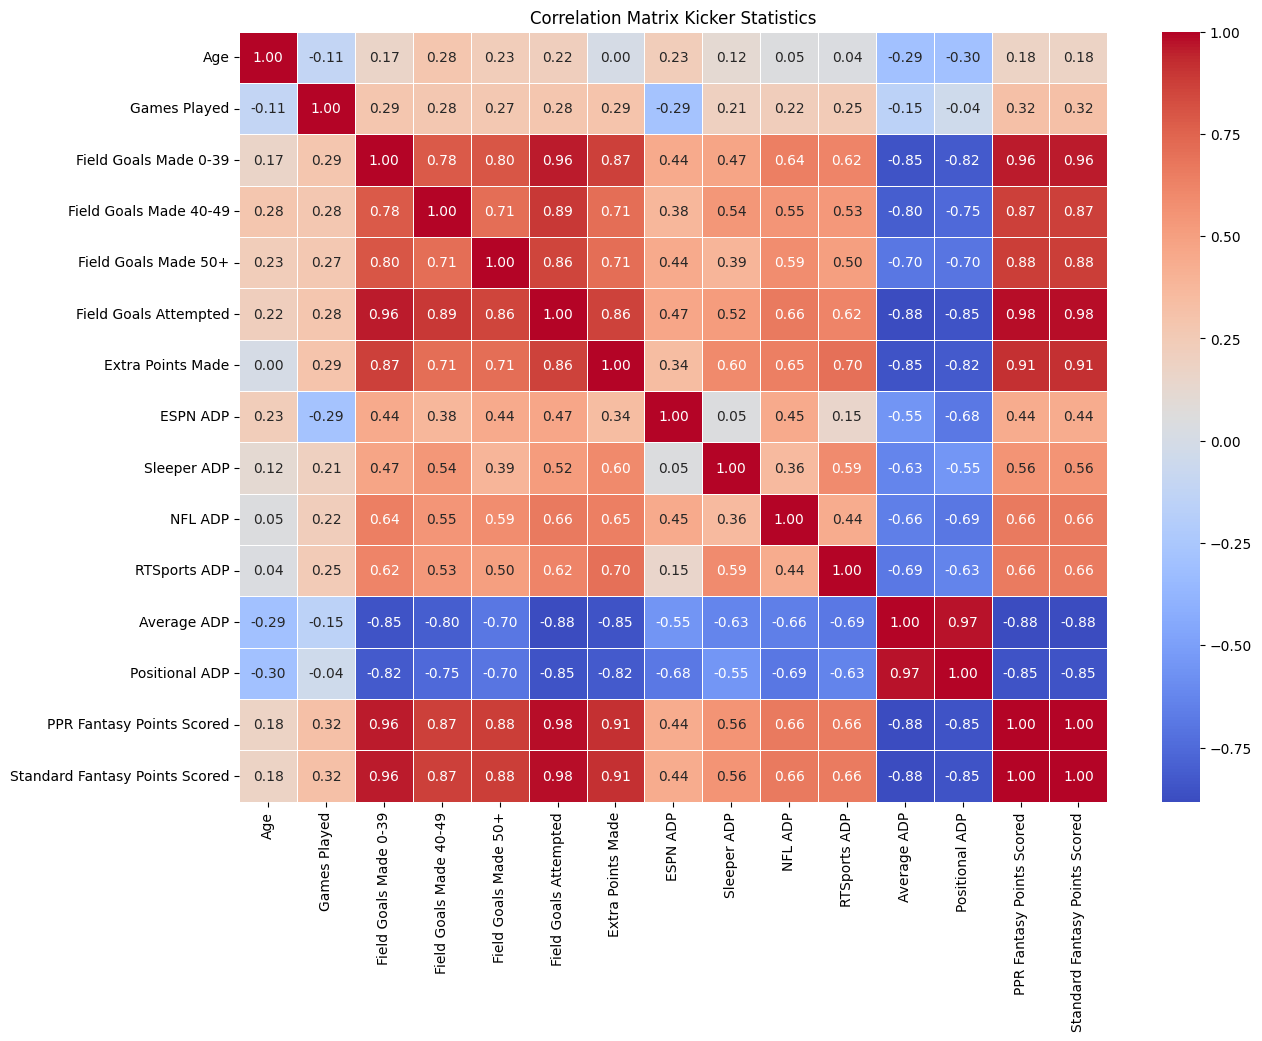

In [37]:
corr_columns_kickers = [
    "Age", "Games Played",
    "Field Goals Made 0-39", "Field Goals Made 40-49", "Field Goals Made 50+", "Field Goals Attempted", "Extra Points Made",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
]

correlation_matrix_kickers = df_kickers[corr_columns_kickers].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_kickers, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Kicker Statistics")
plt.show()


In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Yards Allowed", "Total Plays", "Takeaways", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  6561.006833
1           Total Yards Allowed          inf
2                   Total Plays    16.785827
3                     Takeaways  2319.814109
4           First Downs Allowed    90.842008
5         Passing Yards Allowed          inf
6    Passing Touchdowns Allowed    34.406724
7         Rushing Yards Allowed          inf
8    Rushing Touchdowns Allowed    28.915634
9           Penalties Committed    24.806900
10                Penalty Yards    26.095782
11       First Downs by Penalty     5.315923
12     Percent Drives Scored On    30.174631
13      Percent Drives Takeaway    67.451347
14                     ST_Sacks     6.737124
15             ST_Interceptions  1491.670252
16         ST_Fumble Recoveries   532.718252
17            ST_Forced Fumbles     6.992165
18                  ST_Safeties     9.816557
19  ST_Special Teams Touchdowns     3.319625
20   Fantasy Points From Points    53.579515
21        

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns



df_defense = df[df["Position"] == "DEF"].copy()

vif_columns_defense = [
    "Total Plays", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP"
]

df_defense[vif_columns_defense] = df_defense[vif_columns_defense].fillna(0)

X_defense = df_defense[vif_columns_defense]
X_defense = sm.add_constant(X_defense)  

vif_data_defense = pd.DataFrame()
vif_data_defense["Feature"] = X_defense.columns
vif_data_defense["VIF"] = [variance_inflation_factor(X_defense.values, i) for i in range(X_defense.shape[1])]

print(vif_data_defense)


                        Feature          VIF
0                         const  6423.339944
1                   Total Plays    11.977694
2           First Downs Allowed    66.001834
3         Passing Yards Allowed    22.417452
4    Passing Touchdowns Allowed    33.834353
5         Rushing Yards Allowed     7.219410
6    Rushing Touchdowns Allowed    28.762224
7           Penalties Committed    14.415264
8                 Penalty Yards    15.820572
9        First Downs by Penalty     4.515015
10     Percent Drives Scored On    26.473788
11      Percent Drives Takeaway    66.961082
12                     ST_Sacks     5.482499
13             ST_Interceptions    40.977530
14         ST_Fumble Recoveries    12.666460
15            ST_Forced Fumbles     6.529734
16                  ST_Safeties     4.360887
17  ST_Special Teams Touchdowns     3.319577
18   Fantasy Points From Points    53.154385
19                     ESPN ADP     6.513343
20                  Sleeper ADP     5.322909
21        

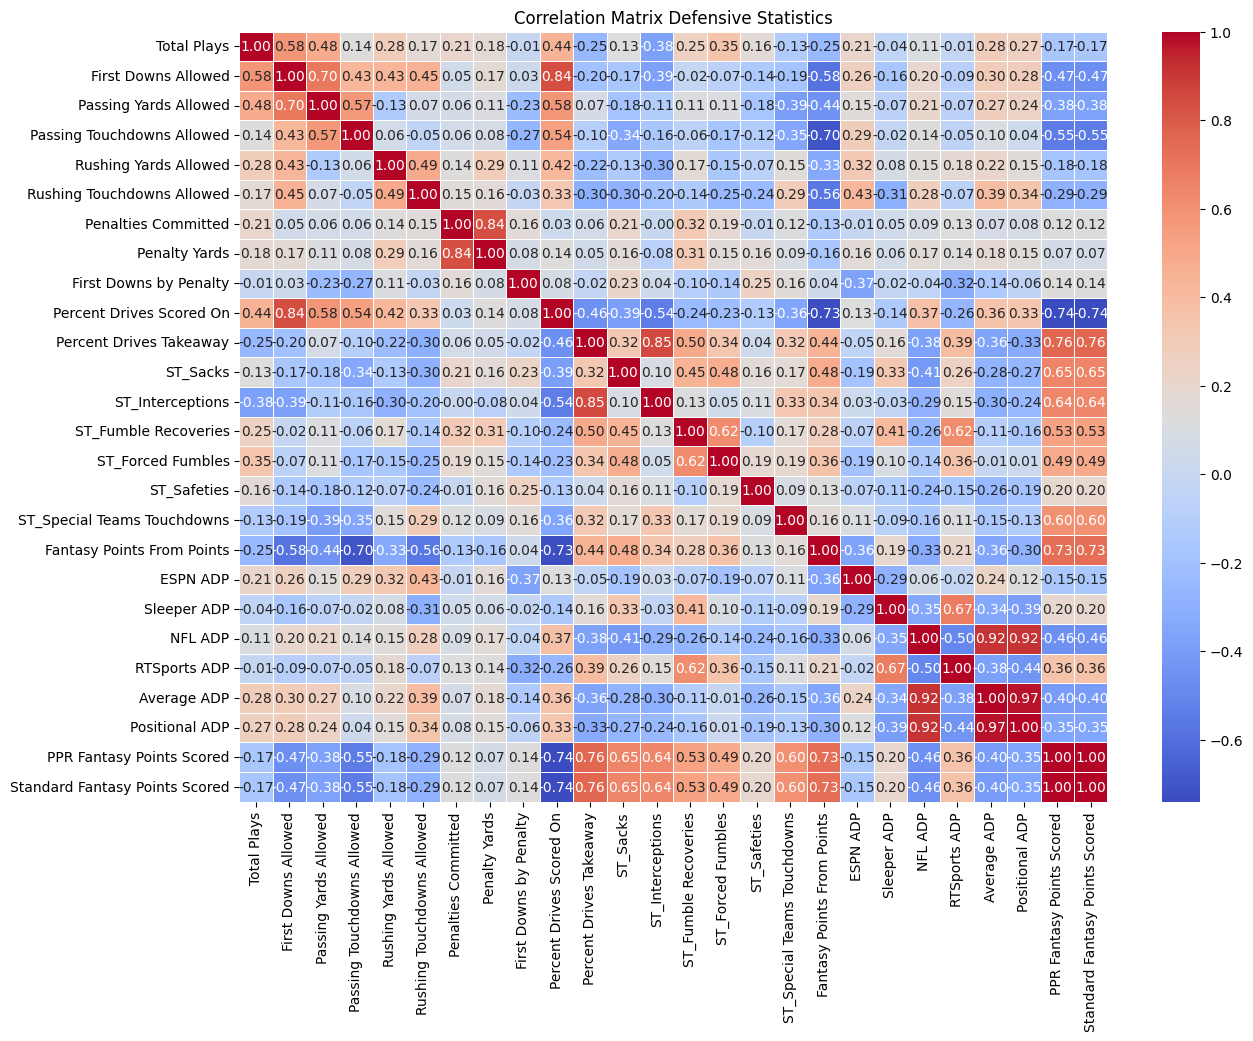

In [40]:
corr_columns_defense = [
    "Total Plays", "First Downs Allowed",
    "Passing Yards Allowed", "Passing Touchdowns Allowed", "Rushing Yards Allowed",
    "Rushing Touchdowns Allowed", "Penalties Committed", "Penalty Yards",
    "First Downs by Penalty", "Percent Drives Scored On", "Percent Drives Takeaway",
    "ST_Sacks", "ST_Interceptions", "ST_Fumble Recoveries", "ST_Forced Fumbles",
    "ST_Safeties", "ST_Special Teams Touchdowns", "Fantasy Points From Points",
    "ESPN ADP", "Sleeper ADP", "NFL ADP", "RTSports ADP", "Average ADP", "Positional ADP", "PPR Fantasy Points Scored", "Standard Fantasy Points Scored"
]

correlation_matrix_defense = df_defense[corr_columns_defense].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_defense, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Defensive Statistics")
plt.show()
